# Setting up MV

In [47]:
from model.master_transmuter import *
from scrape.scraper import *
import query
import unit_tests

In [4]:
import pandas as pd
import numpy as np

In [5]:
mythic_df = pd.read_csv("data/all_vintage_cards-mythic_recent.csv")
rare_df = pd.read_csv("data/all_vintage_cards-rare_recent.csv")
print('Mythic cards: {}'.format(mythic_df.shape[0]))
print('Rare cards: {}'.format(rare_df.shape[0]))

Mythic cards: 1846
Rare cards: 12588


In [6]:
mythic_df.sample(10)

,Unnamed: 0,id,name,set_name,type_line,mana_cost,rarity,oracle_text,power,toughness,loyalty,cmc,set,color_identity,colors,reprint,layout,legalities,recent_date,recent_price
1550,17461,5bfcfb4e-1d1a-49b2-810c-cdcde29a3bcf,Serra Avatar,Duels of the Planeswalkers Promos 2012,Creature — Avatar,{4}{W}{W}{W},mythic,Serra Avatar's power and toughness are each eq...,*,*,NaN,7.0,pdp12,['W'],['W'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
1428,15367,fcdbb062-0b0b-4b4c-b4db-dd149f744baa,Ral Zarek,Dragon's Maze,Legendary Planeswalker — Ral,{2}{U}{R},mythic,"+1: Tap target permanent, then untap another t...",NaN,NaN,4,4.0,dgm,"['R', 'U']","['R', 'U']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
1287,13517,a01f829b-22aa-4988-9698-5e1ebceb1dd8,Scourge of the Throne,Conspiracy,Creature — Dragon,{4}{R}{R},mythic,Flying\r\r\nDethrone (Whenever this creature a...,5,5,NaN,6.0,cns,['R'],['R'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542057e+12,17.4
0,0,ff92804a-0c62-4eb8-bbba-f1ca6f426b6e,"Urborg, Tomb of Yawgmoth",Ultimate Box Topper,Legendary Land,NaN,mythic,Each land is a Swamp in addition to its other ...,NaN,NaN,NaN,0.0,puma,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
1551,17462,fa3fc5bf-f20c-47d3-8bbe-4c1c774074fb,Primordial Hydra,Duels of the Planeswalkers Promos 2012,Creature — Hydra,{X}{G}{G},mythic,Primordial Hydra enters the battlefield with X...,0,0,NaN,2.0,pdp12,['G'],['G'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
1650,18912,5d393da0-4cb6-4ae8-b747-8e6d0fa7f55a,"Thrun, the Last Troll",Mirrodin Besieged,Legendary Creature — Troll Shaman,{2}{G}{G},mythic,This spell can't be countered.\r\r\nHexproof (...,4,4,NaN,4.0,mbs,['G'],['G'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542096e+12,3.9
345,3714,b9236e45-3d4f-4d4a-9882-3a6f99dd1ead,"Vona, Butcher of Magan",Ixalan Promos,Legendary Creature — Vampire Knight,{3}{W}{B},mythic,"Vigilance, lifelink\r\r\n{T}, Pay 7 life: Dest...",4,4,NaN,5.0,pxln,"['B', 'W']","['B', 'W']",True,normal,"{'standard': 'legal', 'future': 'legal', 'fron...",NaN,NaN
199,1949,ab8935b1-ec87-4330-9952-9ef8cd344531,"Grothama, All-Devouring",Battlebond,Legendary Creature — Wurm,{3}{G}{G},mythic,"Other creatures have ""Whenever this creature a...",10,8,NaN,5.0,bbd,['G'],['G'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
991,9715,a49e324f-8727-4ab5-aa76-c3c3c8725602,Eye of Ugin,Zendikar Expeditions,Legendary Land,NaN,mythic,Colorless Eldrazi spells you cast cost {2} les...,NaN,NaN,NaN,0.0,exp,[],[],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN
34,34,7b821fbd-5186-45bd-b154-176a1436d24d,Temporal Manipulation,Ultimate Box Topper,Sorcery,{3}{U}{U},mythic,Take an extra turn after this one.,NaN,NaN,NaN,5.0,puma,['U'],['U'],True,normal,"{'standard': 'not_legal', 'future': 'not_legal...",NaN,NaN


In [10]:
clean_mythic_df = mythic_df[~pd.isnull(mythic_df['recent_price'])]
clean_rare_df = rare_df[~pd.isnull(rare_df['recent_price'])]

4209

In [12]:
clean_mythic_df.describe()

,Unnamed: 0,cmc,recent_date,recent_price
count,568.000000,568.000000,5.680000e+02,568.000000
mean,10684.330986,4.554577,1.539819e+12,27.059331
std,5621.492690,2.336848,4.992627e+09,62.099935
min,2028.000000,0.000000,1.523362e+12,0.200000
25%,6726.750000,3.000000,1.542027e+12,1.200000
50%,9724.500000,5.000000,1.542058e+12,3.900000
75%,14514.750000,6.000000,1.542087e+12,10.000000
max,22730.000000,12.000000,1.542101e+12,450.000000


In [13]:
clean_rare_df.describe()

,Unnamed: 0,loyalty,cmc,recent_date,recent_price
count,4209.000000,4.000000,4209.000000,4.209000e+03,4209.000000
mean,22614.140413,4.500000,3.925873,1.540245e+12,4.929746
std,11004.884816,1.290994,2.060219,5.835097e+09,18.128020
min,2023.000000,3.000000,0.000000,1.441591e+12,0.100000
25%,12307.000000,3.750000,3.000000,1.542026e+12,0.400000
50%,24958.000000,4.500000,4.000000,1.542084e+12,1.800000
75%,31622.000000,5.250000,5.000000,1.542096e+12,3.300000
max,39782.000000,6.000000,16.000000,1.542108e+12,323.200000


## Price EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

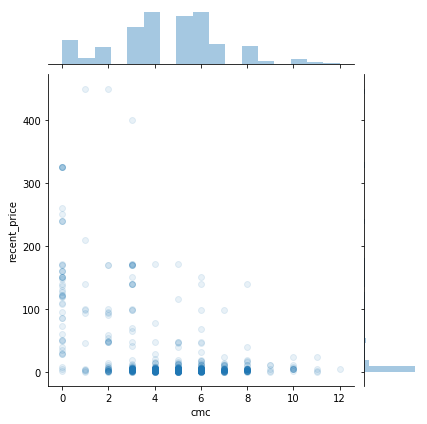

In [44]:
sns.jointplot(clean_mythic_df['cmc'], clean_mythic_df['recent_price'], joint_kws={'alpha':0.1})

(0, 80)

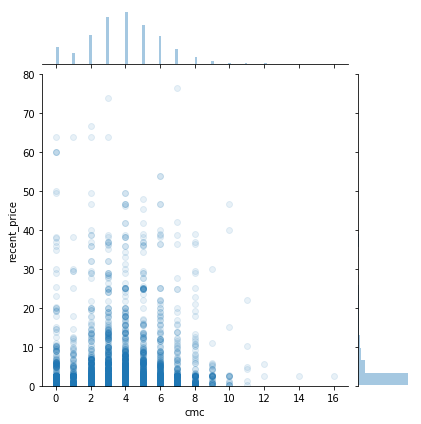

In [45]:
sns.jointplot(clean_rare_df['cmc'].astype('int'), clean_rare_df['recent_price'], joint_kws={'alpha':0.1}, marginal_kws={'bins':100})
plt.ylim(0,80)

(0, 80)

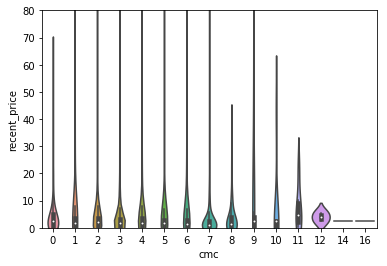

In [43]:
sns.jointplot(clean_rare_df['cmc'].astype('int'), clean_rare_df['recent_price'], joint_kws={'alpha':0.1}, marginal_kws={'bins':100})

### TRANSFORM

In [109]:
aberrant_researcher = CreatureFeatureTransformer()

In [110]:
perfected_form = aberrant_researcher.transform(clean_rare_df)

In [112]:
perfected_form.sample(10)

,Unnamed: 0,id,name,set_name,type_line,mana_cost,rarity,oracle_text,power,toughness,...,colors,reprint,layout,legalities,recent_date,recent_price,pt_type,p:t,avg_pt,cmc:apt
2555,8098,4d0c5127-cd17-4859-8de8-165c4c748e89,Second Harvest,Shadows over Innistrad,Instant,{2}{G}{G},rare,"For each token you control, create a token tha...",NaN,NaN,...,['G'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542027e+12,0.1,none,NaN,NaN,NaN
8419,28296,29d11b14-43a9-4d1c-ba2c-3025d51d841e,Mesmeric Orb,Mirrodin,Artifact,{2},rare,"Whenever a permanent becomes untapped, that pe...",NaN,NaN,...,[],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542096e+12,3.8,none,NaN,NaN,NaN
7298,25022,da4438fe-b11b-4adb-b8dd-b44e12ef6124,"Vorosh, the Hunter",Planar Chaos,Legendary Creature — Dragon,{3}{B}{G}{U},rare,"Flying\nWhenever Vorosh, the Hunter deals comb...",6,6,...,"['B', 'G', 'U']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.539677e+12,0.5,static,1,6,1
4216,13504,21739c08-054a-4ede-b551-de7de3f50bfe,Magister of Worth,Conspiracy,Creature — Angel,{4}{W}{B},rare,Flying\nWill of the council — When Magister of...,4,4,...,"['B', 'W']",False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542057e+12,0.2,static,1,4,1.5
10924,36563,19528a24-4968-4742-a2d1-06f94e60f290,Torrent of Lava,Mirage,Sorcery,{X}{R}{R},rare,Torrent of Lava deals X damage to each creatur...,NaN,NaN,...,['R'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.541405e+12,0.7,none,NaN,NaN,NaN
11793,39203,61510e88-97d0-410a-9431-ebf12990e33d,Time Elemental,Legends,Creature — Elemental,{2}{U},rare,"When Time Elemental attacks or blocks, at end ...",0,2,...,['U'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542043e+12,35.2,static,0,1,3
5859,19858,23a1d384-1b36-42d0-957f-48103f9cdbdd,True Conviction,Scars of Mirrodin,Enchantment,{3}{W}{W}{W},rare,Creatures you control have double strike and l...,NaN,NaN,...,['W'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542096e+12,0.8,none,NaN,NaN,NaN
5834,19738,dce72636-08e4-484e-ad81-4d1597a31ffb,Contagion Engine,Scars of Mirrodin,Artifact,{6},rare,"When Contagion Engine enters the battlefield, ...",NaN,NaN,...,[],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542096e+12,3.8,none,NaN,NaN,NaN
9757,32705,35ea3762-a419-412c-b2bd-0a40902d8d51,Ivory Mask,Mercadian Masques,Enchantment,{2}{W}{W},rare,You have shroud. (You can't be the target of s...,NaN,NaN,...,['W'],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542096e+12,4.6,none,NaN,NaN,NaN
9658,32405,477a1f53-5cdf-4b45-b584-2e36b31a3fdb,Rishadan Port,Mercadian Masques,Land,NaN,rare,"{T}: Add {C}.\n{1}, {T}: Tap target land.",NaN,NaN,...,[],False,normal,"{'standard': 'not_legal', 'future': 'not_legal...",1.542096e+12,64.0,none,NaN,NaN,NaN


In [113]:
perfected_form[perfected_form['pt_type']=='static'].columns

Index(['Unnamed: 0', 'id', 'name', 'set_name', 'type_line', 'mana_cost',
       'rarity', 'oracle_text', 'power', 'toughness', 'loyalty', 'cmc', 'set',
       'color_identity', 'colors', 'reprint', 'layout', 'legalities',
       'recent_date', 'recent_price', 'pt_type', 'p:t', 'avg_pt', 'cmc:apt'],
      dtype='object')

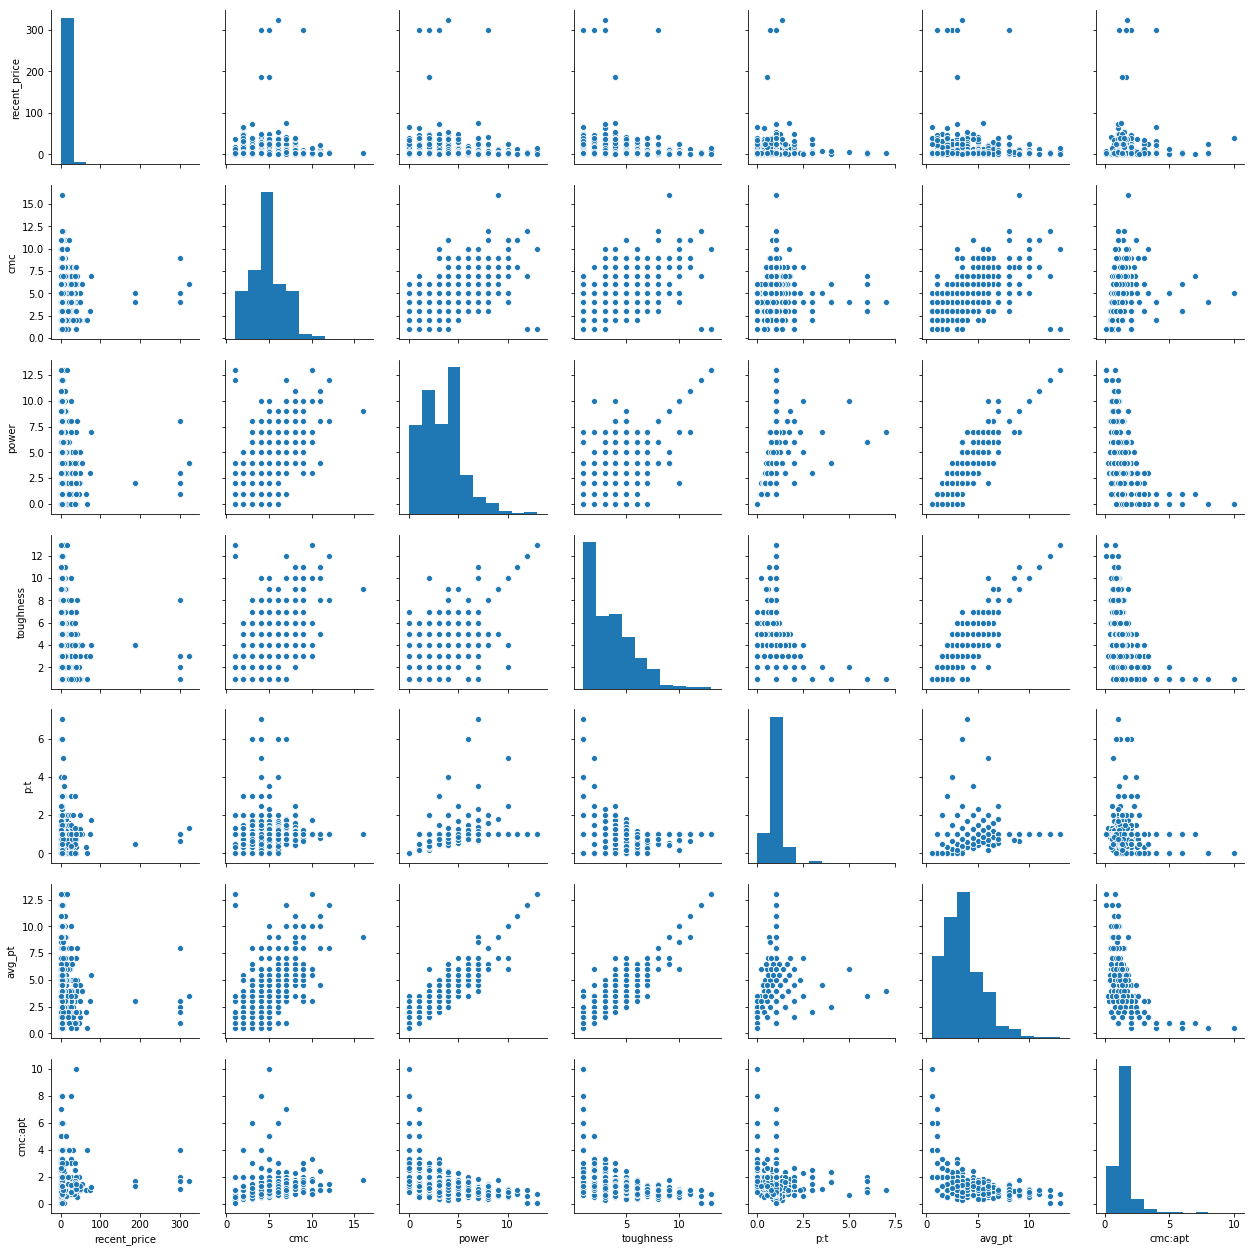

In [116]:
features = ['recent_price','cmc','power','toughness','p:t','avg_pt','cmc:apt']
sns.pairplot(perfected_form[perfected_form['pt_type']=='static'][features].astype(float))

In [120]:
perfected_form[perfected_form['recent_price']>100][['name','set_name','recent_price']]

,name,set_name,recent_price
9761,Cornered Market,Mercadian Masques,280.0
9897,Zodiac Dragon,Portal Three Kingdoms,300.0
9898,"Yuan Shao, the Indecisive",Portal Three Kingdoms,300.0
9899,Yellow Scarves General,Portal Three Kingdoms,300.0
9900,Warrior's Oath,Portal Three Kingdoms,300.0
9901,Rolling Earthquake,Portal Three Kingdoms,300.0
9902,Relentless Assault,Portal Three Kingdoms,300.0
9903,"Ma Chao, Western Warrior",Portal Three Kingdoms,300.0
9904,"Lu Bu, Master-at-Arms",Portal Three Kingdoms,323.2
9905,"Dong Zhou, the Tyrant",Portal Three Kingdoms,300.0
